In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

import helper

In [2]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 10)
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.layer1(x)))
        x = self.dropout(F.relu(self.layer2(x)))
        x = self.dropout(F.relu(self.layer3(x)))
        x = self.dropout(F.relu(self.layer4(x)))

        # output so no dropout here
        x = F.log_softmax(self.layer5(x), dim=1)

        return x


In [4]:
# create model
model = Network()

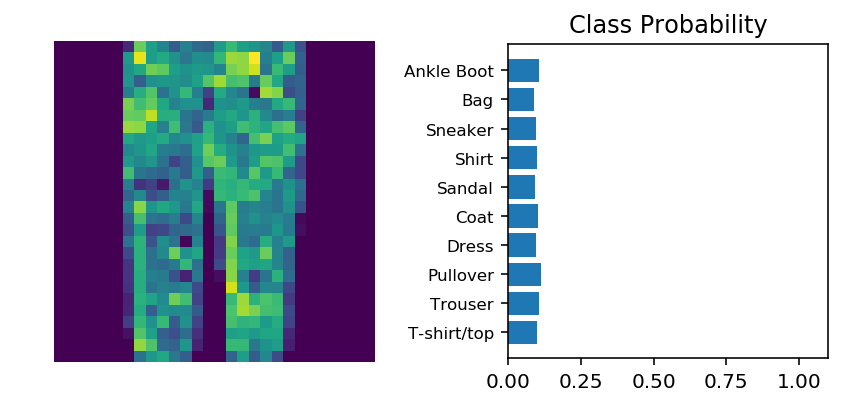

In [5]:
# send pic to model
model.eval()

images,labels = next(iter(train_loader))

# take single img
img = images[0]
# conver to 1D
img = img.view(1,784)

with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
helper.view_classify(img.view(1,28,28),ps,version='Fashion')

In [6]:
# load model
state_dict = torch.load("fasionModel.pth")
model.load_state_dict(state_dict)
print(model)

Network(
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


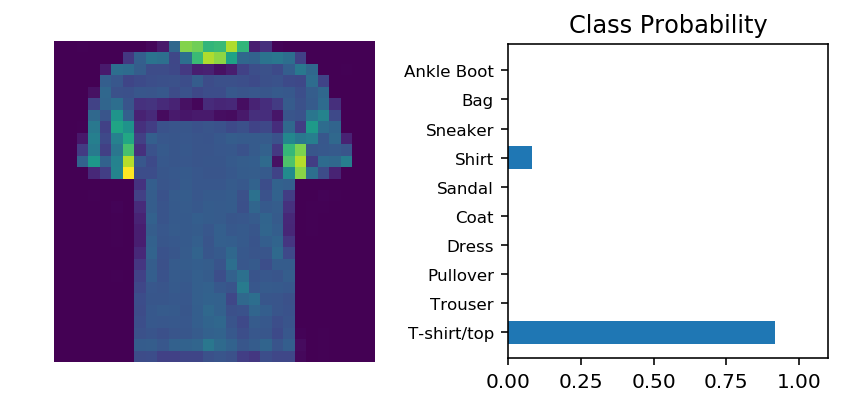

In [7]:
# send the pic again
model.eval()

images,labels = next(iter(train_loader))

# take single img
img = images[0]
# conver to 1D
img = img.view(1,784)

with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
helper.view_classify(img.view(1,28,28),ps,version='Fashion')